In [18]:
import pandas as pd
import seaborn as sns

# Data Cleaning

In [24]:
data = pd.read_csv("loan/loan.csv")

C:\Users\anand\AppData\Local\Temp\ipykernel_9376\1451730680.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan/loan.csv")


## Step 1: Identifying relevant fields

In [25]:
# Taking only relevant columns

loan_data=data[['id', 'member_id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment', 
                'grade', 'sub_grade','emp_title','emp_length','home_ownership','annual_inc',
                'verification_status','issue_d',
                'loan_status','purpose','title','zip_code','addr_state','dti',
                'delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
                'mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'
                
]]
# Need to check later
# 'pymnt_plan','url','desc', 'initial_list_status','collections_12_mths_ex_med','mths_since_last_major_derog',
# 'policy_code','application_type'

## Step 2: Converting Data Type

1. term - Convert to numbers (remove 'months')
2. int_rate - Convert to number (remove %)
3. emp_length - Convert. <1 to 0, 10+ to 10
4. emp_title - create new column emp_name, for date > 9/23/2013
5. revol_util - Convert to number (remove %) 

In [26]:
loan_data.loc[:, "term"] = loan_data["term"].str.strip().str.replace(" months", "").astype(int)
loan_data.loc[:, "int_rate"] = loan_data["int_rate"].str.strip().str.replace("%", "").astype(float)
loan_data.loc[:, "revol_util"] = [
    float(x.replace("%", "")) if pd.notna(x) else x for x in loan_data["revol_util"]
]


In [27]:
def empLengthConvert(x):
    if pd.isna(x):
        return
    else:
        if x=='< 1 year':
            return 0
        if x=='10+ years':
            return 10
        else:
            return int(x[0:2]);
loan_data.loc[:, "emp_length"] = [empLengthConvert(x) for x in loan_data["emp_length"]]

In [29]:
# 
loan_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [30]:
loan_data.to_csv("updated-data.csv")

In [34]:

df2 = loan_data.isnull().mean()*100
df2 = df2[df2>0]
df2

emp_title                  6.191303
emp_length                 2.706650
title                      0.027696
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
revol_util                 0.125891
last_pymnt_d               0.178765
next_pymnt_d              97.129693
last_credit_pull_d         0.005036
pub_rec_bankruptcies       1.754916
dtype: float64

## Step 3: Checking for outliers

# Analysis

Check Loan Status vs Purpose percentage.
Conclusion - People who take loan for Small business is comparatively not paying the loan (25% is charged off)
 

<Axes: xlabel='purpose'>

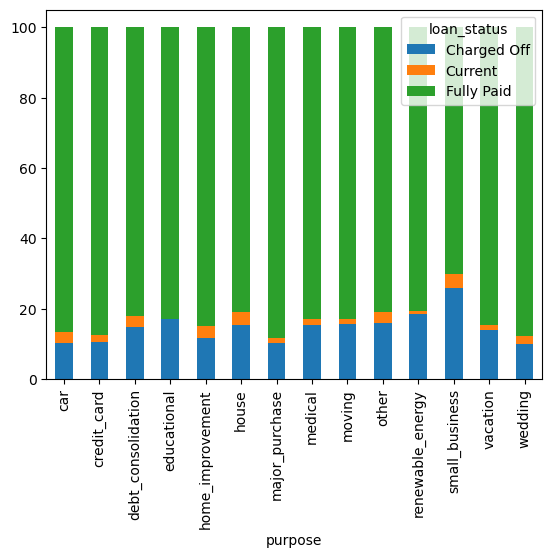

In [28]:
pt = pd.pivot_table(data=loan_data,  
               columns="loan_status", 
               index="purpose", aggfunc="size",
               fill_value=0)
ptPercentage  = pt.div(pt.sum(axis=1), axis=0) * 100
ptPercentage.plot(kind="bar", stacked=True)

## Changing data type